In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
credits_column_renamed = credits.rename(index = str, columns={'movie_id':'id'})

In [5]:
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')

In [16]:
movies_cleaned_df = movies_df_merge.drop(columns = ['homepage', 'title_x', 'title_y', 'status', 'production_countries'])

In [69]:
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
C = movies_cleaned_df['vote_average'].mean()
m = movies_cleaned_df['vote_count'].quantile(0.70)

In [71]:
movies_cleaned_df['weighted_average'] = ((R*v) + (C*m))/(v+m)

In [74]:
movies_sorted_ranking = movies_cleaned_df.sort_values('weighted_average', ascending=False)

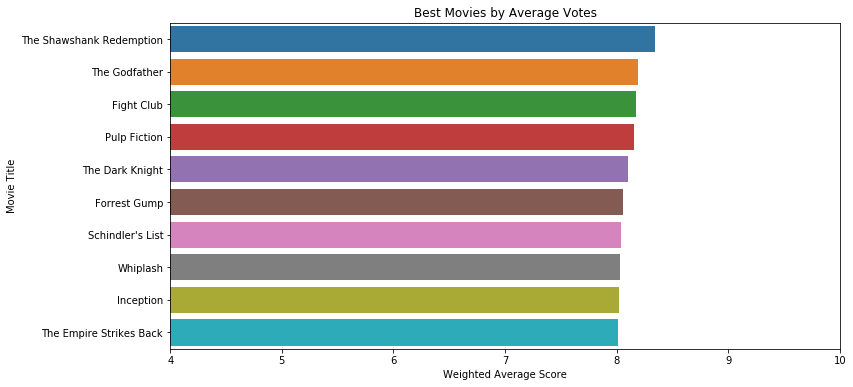

In [84]:
plt.figure(figsize=(12,6))
axis1 = sns.barplot(x = movies_sorted_ranking['weighted_average'].head(10), 
                    y = movies_sorted_ranking['original_title'].head(10))
plt.xlim(4,10)
plt.title('Best Movies by Average Votes')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')
plt.savefig('Best Movies by Average.png')

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [86]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)